In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
baseline = pd.read_csv('mrl-4/progress.csv')
batch_1 = pd.read_csv('mrl-5/progress.csv')
batch_2 = pd.read_csv('mrl-6/progress.csv')
print(batch_1)

     StdReturn  Average reward  AverageReturn  Average latency  MaxReturn  \
0     3.001538       -8.729289      -8.729289     1.083727e+06  -2.349134   
1     2.672802       -8.207837      -8.207837     1.019609e+06  -2.547010   
2     2.656011       -8.417191      -8.417191     1.057099e+06  -3.024003   
3     2.690497       -8.683257      -8.683257     1.092298e+06  -2.811220   
4     2.728819       -9.005067      -9.005067     1.126546e+06  -3.303759   
..         ...             ...            ...              ...        ...   
995   2.947581      -10.736939     -10.736939     1.345267e+06  -6.101994   
996   2.954222      -10.745249     -10.745249     1.350438e+06  -5.933768   
997   2.977961      -10.744569     -10.744569     1.353733e+06  -6.101994   
998   3.000624      -10.755919     -10.755919     1.353571e+06  -6.101994   
999   2.993308      -10.746503     -10.746503     1.353223e+06  -6.101994   

     AverageDiscountedReturn  PolicyExecTime  Average greedy latency  \
0  

## Reward

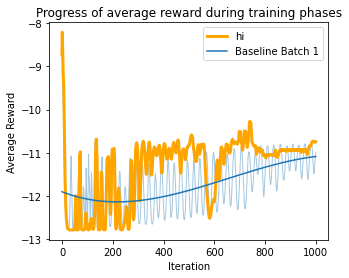

In [20]:
def fit_line(x, y, n, linspace=None):
    if linspace:
        return np.poly1d(np.polyfit(x, y, n))(linspace)
    return np.poly1d(np.polyfit(x, y, n))(x)

baseline_x = baseline['Itr']
baseline_y = baseline['Average reward']
baseline_fit = fit_line(baseline_x, baseline_y, 3)

batch_1_x = batch_1['Itr']
batch_1_y = batch_1['Average reward']
# batch_1_fit = fit_line(batch_1_x, batch_1_y, 1)

# batch_2_x = batch_2['Itr']
# batch_2_y = batch_2['Average reward']
# batch_2_fit = fit_line(batch_2_x, batch_2_y, 5)

plt.figure(figsize=(5,4))
plt.tight_layout()
plt.plot(baseline['Itr'], baseline['Average reward'], linewidth=1, alpha=0.4, c='tab:blue')
plt.plot(batch_1['Itr'], batch_1['Average reward'], linewidth=3, c='orange', label='hi')
# plt.plot(batch_2['Itr'], batch_2['Average reward'], linewidth=1, alpha=0.4, c='green')

plt.plot(baseline_fit, label='Baseline Batch 1', c='tab:blue')
# plt.plot(batch_1_fit, label='Batch 1', c='orange')
# plt.plot(batch_2_fit, label='Batch 2', c='green')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Average Reward')
plt.title('Progress of average reward during training phases')
plt.savefig('reward-new.pgf')

## Return

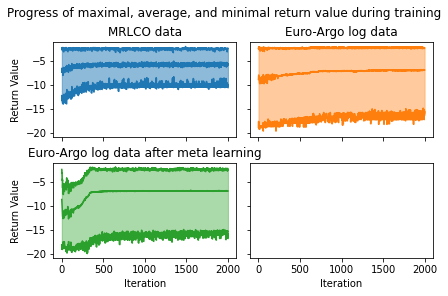

In [60]:
mrlco_avg = mrlco['AverageReturn']
mrlco_min = mrlco['MinReturn']
mrlco_max = mrlco['MaxReturn']

first_avg = first['AverageReturn']
first_min = first['MinReturn']
first_max = first['MaxReturn']

after_avg = after['AverageReturn']
after_min = after['MinReturn']
after_max = after['MaxReturn']


fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, constrained_layout=True, sharex=True, sharey=True)

ax1.set_title('MRLCO data')
ax1.plot(mrlco_x, mrlco_avg, c='tab:blue')
ax1.plot(mrlco_x, mrlco_min, c='tab:blue')
ax1.plot(mrlco_x, mrlco_max, c='tab:blue')
ax1.fill_between(mrlco_x, mrlco_min, mrlco_max, alpha=0.5, color='tab:blue')

ax2.set_title('Euro-Argo log data')
ax2.plot(first_x, first_avg, c='tab:orange')
ax2.plot(first_x, first_min, c='tab:orange')
ax2.plot(first_x, first_max, c='tab:orange')
ax2.fill_between(first_x, first_min, first_max, alpha=0.4, color='tab:orange')

ax3.set_title('Euro-Argo log data after meta learning')
ax3.plot(after_x, after_avg, c='tab:green')
ax3.plot(after_x, after_min, c='tab:green')
ax3.plot(after_x, after_max, c='tab:green')
ax3.fill_between(after_x, after_min, after_max, alpha=0.4, color='tab:green')

plt.setp([ax3, ax4], xlabel='Iteration')
plt.setp([ax1, ax3], ylabel='Return Value')
fig.suptitle('Progress of maximal, average, and minimal return value during training')
plt.show()

## Execution Time

In [85]:
def exec_times(dataframes, names):
    means = pd.DataFrame(columns=('PolicyExecTime', 'EnvExecTime'))
    for name, dataframe in zip(names, dataframes):
        df = dataframe[['PolicyExecTime', 'EnvExecTime']].sum()
        df.name = name
        means = means.append(df)

    means['Total'] = means.sum(axis=1)
    return means

exec_times([mrlco, first, after], ['mrlco data', 'Euro-Argo log data', 'Euro-Argo log data after meta learning'])

,PolicyExecTime,EnvExecTime,Total
mrlco data,4955.190716,1906.546153,6861.736869
Euro-Argo log data,4970.863486,1906.830571,6877.694057
Euro-Argo log data after meta learning,5012.970695,1821.862364,6834.833059


In [133]:

fr = first['Average reward'].round(1)
ar = after['Average reward'].round(1)

m = np.max(fr)

print(fr.argmax())
print(m)

print(ar.tolist().index(m - 0.2))

print()

print(fr.tolist().index(-6.8))
print(ar.tolist().index(-6.8))

1955
-6.7
486

1345
920
